In [6]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from catboost import Pool, cv
random_state = 7
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import os
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [19]:
def find_intersection(tr, ts, iterations, learning_rate,depth, weight, no_genes=100):
       # get current directory
    path = os.getcwd()
    parent = os.path.dirname(path)

    train = pd.read_csv(parent + '\Data\\' + tr + ".csv")
    test = pd.read_csv(parent + '\Data\\' + ts + ".csv")
    
    X_train = train.drop("target", axis=1)
    y_train = train["target"]
    
    X_test  = test.drop("target", axis=1)
    y_test = test["target"]
    
        # initialize Pool
    train_pool = Pool(X_train, 
                      y_train)
        # initialize Pool
    test_pool = Pool(X_test, 
                      y_test)
    
    start_time = time.time()

    model = CatBoostClassifier(iterations=iterations,
                           depth=depth,
                           learning_rate=learning_rate,
                           loss_function='Logloss',
                           class_weights=[weight, 1-weight],
                           verbose=False)

    model.fit(train_pool)
    print("--- %s seconds ---" % (time.time() - start_time))
    
    LossFunctionChange = CatBoostClassifier.get_feature_importance(model, type="LossFunctionChange",data=test_pool)
    ind_LossFunctionChange = np.argpartition(LossFunctionChange, -no_genes)[-no_genes:]
    df_loss_function = pd.DataFrame()
    df_loss_function["feature"] = list(X_train.columns)
    df_loss_function["importance"] = LossFunctionChange
    df_loss_function= df_loss_function.sort_values(by = "importance", ascending = False)
    
    PredictionValuesChange = CatBoostClassifier.get_feature_importance(model)
    ind_PredictionValuesChange = np.argpartition(PredictionValuesChange, -no_genes)[-no_genes:]
    
    df_pred_value = pd.DataFrame()
    df_pred_value["feature"] = list(X_train.columns)
    df_pred_value["importance"] = PredictionValuesChange
    df_pred_value = df_pred_value.sort_values(by = "importance", ascending = False)
    
    intersection = (X_train.columns[(np.intersect1d(ind_PredictionValuesChange, ind_LossFunctionChange))])
    return df_loss_function, df_pred_value, intersection
    

In [20]:

tr = "trainset_AMLvsALL_90_target_in"
ts = "testset_AMLvsALL_10_target_in"

no_genes = 100

a,b,c = find_intersection(tr, ts, 200, 0.4, 4, 0.5, no_genes )

--- 53.4799222946167 seconds ---


In [21]:
len(['CSRP1', 'SLC25A5', 'RPS10', 'ACTA2', 'IFITM1', 'HSPG2', 'MOB4', 'NRGN',
       'RAB32', 'TMEM243', 'GOLIM4', 'TFF3', 'COL17A1', 'PTGS2', 'LCK', 'RHOH',
       'CFD', 'TPSB2', 'SYNGR3', 'RASGRP3', 'ADAM28', 'BLK', 'PPP3CC', 'GIPC1',
       'DGKZP1', 'ST7', 'CHIT1', 'TSPAN4', 'GLRX', 'PRKD2', 'PLAGL1', 'TM4SF1',
       'GATA2', 'NCKAP1L', 'MGLL', 'NPIPB13', 'SBF1', 'SPART', 'LCN2', 'CD3D|',
       'MARS', 'NOV', 'CTSW', 'RIF1', 'TRPC6', 'PDCD6IPP2', 'TTC19', 'CDCA4',
       'PDGFC', 'ZBTB10', 'MICALL2', 'PGGHG', 'SEC61A2', 'CD177', 'NPR3',
       'RPL22', 'RTN2'])

57

In [22]:
a

,feature,importance
7011,SPART,0.003953
3732,BLK,0.002065
3097,CFD,0.001982
4833,ST7,0.001788
7954,CTSW,0.001555
...,...,...
7335,CHI3L2,-0.000809
11293,ARPP21,-0.000922
2683,MYB,-0.001272
12145,LEF1,-0.001551


In [23]:
b

,feature,importance
8128,ZNF423,8.971597
3097,CFD,7.086261
12145,LEF1,4.903860
9876,PDGFC,4.220162
10817,NPR3,4.127818
...,...,...
4322,HRC,0.000000
4323,HDC,0.000000
4324,ZFP37,0.000000
4325,RGR,0.000000


In [31]:
def show_imp(di,di0,k):
    %matplotlib inline 
    import matplotlib.pyplot as plt
    import shap
    dfi = di.head(k)
    # feats importance
    plt.rcParams["figure.figsize"] = (12,7)
    ax = dfi.plot('feature', 'importance', kind='bar', color='c')
    ax.set_title("Feature Importance of CatBoost", fontsize = 14)
    plt.show()
    print(". - .")
    print(" ")
    # feats importance LossFunctionChange
    dfi0 = di0.head(k)
    plt.rcParams["figure.figsize"] = (12,7)
    ax1 = dfi0.plot('feature', 'importance', kind='bar', color='m')
    ax1.set_title("Feature Importance of LossFunctionChange", fontsize = 14)

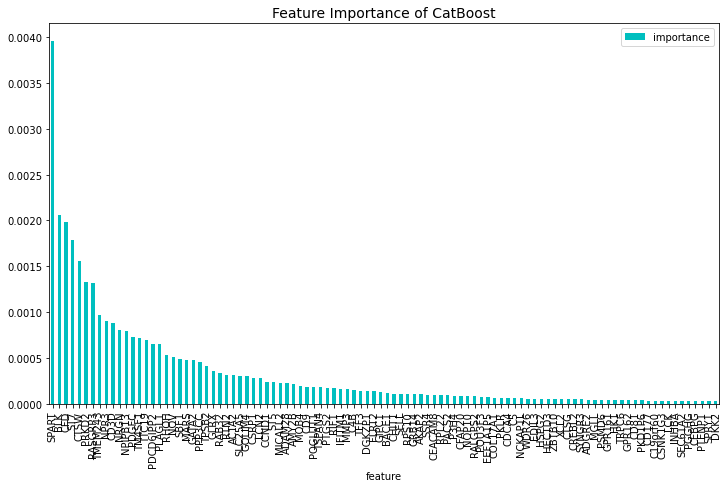

. - .
 


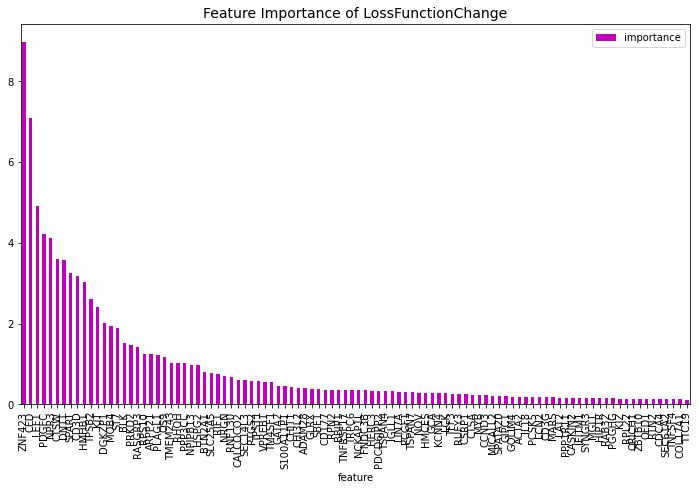

In [32]:
show_imp(a,b,no_genes)

In [30]:
pip install shap

     -------------------------------------- 431.3/431.3 KB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 40.8/40.8 KB ? eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4

